In [1]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the csv data and verifying the data by checking the first five rows
haberman = pd.read_csv("Assignment_2_haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Reference:**[https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival#:~:text=The%20dataset%20contains%20cases%20from,undergone%20surgery%20for%20breast%20cancer.&text=Relevant%20Papers%3A,Haberman%2C%20S.%20J.%20(1976)]

To understand this data in details, I referred the UCI Machine Learning Repository for Haberman's Survival 
Data Set and understood below information abount the attributes:
    
- Column age represents ==> Age of patient at time of operation (numerical)
- Column year represents ===> Patient's year of operation (year - 1900, numerical)
- Column node represents ===> Number of positive axillary nodes detected (numerical)
- Column status represents ===> Survival status (class attribute)
  - 1 = the patient survived 5 years or longer
  - 2 = the patient died within 5 year

In [3]:
# Updating the columns names so that they are in line with the UCI information for the attributes 
# for better understanding

haberman.columns = ['patient_age','operation_year','auxilary_node','status']
haberman.head()

,patient_age,operation_year,auxilary_node,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#Determining the shape and size of the dataset
haberman.shape

(306, 4)

In [5]:
haberman.size

1224

**Observation:** 
1. The dataset constains 306 rows and 4 columns

In [6]:
# Brief information about the dataset
print(haberman.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   patient_age     306 non-null    int64
 1   operation_year  306 non-null    int64
 2   auxilary_node   306 non-null    int64
 3   status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [7]:
# Checking the null elements for each coulmn in the dataset
haberman.isnull().sum()

patient_age       0
operation_year    0
auxilary_node     0
status            0
dtype: int64

**Observation:** 
1. The data looks good with No Null values

In [8]:
#How many patients survied for 5 years and more
haberman.status.value_counts()

1    225
2     81
Name: status, dtype: int64

**Observation:**
1. The data shows more number of patients survived for 5 years and more.

In [9]:
# As column status is the shows whether the patient survived or not i.e. in integer type, so changing it into a
# more categorical type using "Yes" and "No" where Yes means patient survived and No means patient didn't survived. 

haberman.status = haberman.status.map({1:'Yes',2:'No'})
haberman.head()

,patient_age,operation_year,auxilary_node,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [10]:
haberman[haberman.status =='Yes'].head() #Verifying the records with status == 'Yes'

,patient_age,operation_year,auxilary_node,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [11]:
haberman[haberman.status =='No'].head() #Verifying the records with status == 'No'

,patient_age,operation_year,auxilary_node,status
7,34,59,0,No
8,34,66,9,No
24,38,69,21,No
34,39,66,0,No
43,41,60,23,No


In [12]:
haberman.describe() # Brief description of the dataset

,patient_age,operation_year,auxilary_node
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**Observation:**
1. Avarage patient age is 52.4 years with a standard deviation of 10.8, i.e majority of the patient's age lies in range 52.4 + OR - 10.8 years.
2. Mean auxolary node is 4.
3. Minimun patient age is 30 yrs and maximum patient age is 83 yrs, minimum auxilary node is 0 and maximum auxilary node is 52

In [13]:
haberman.status.value_counts()

Yes    225
No      81
Name: status, dtype: int64

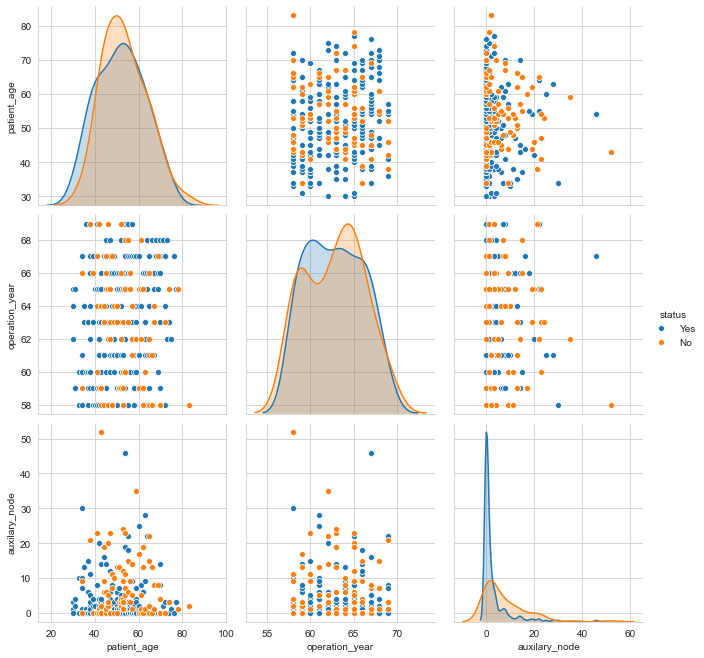

In [14]:
# Plotting the pair plot for the data since the dimesion of the data is not large.
# Ploatting pair plot using sns (seaborn)
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status", height=3)
plt.show()

**Observation:**
1. The pair plot shows a lot of overlapping between survivors and non-survivors for different combinations of attributes. So it's difficult to classify the data points based on pair plots.
2. Plots between operation_year & patient_age as well as operation_year & auxilary_node shows a lot of overlapping and we can't consider this as a paramter for distinguishing between survival and non-survival. 
3. From plot 3 or plot 7 we can understand that as the auxilary_nodes increases,the number of survival points(points in blue for 'Yes') reduces. This indicates that auxilary_node is one of the important attribute for determining the survival of the patients.
4. Therefore, patient_age and auxilary_node (plot 3 & 7) are the two important factors which must be considered for further analysis.

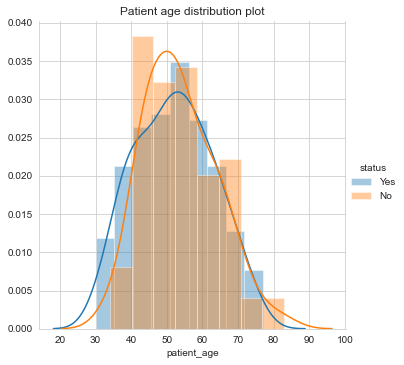

In [15]:
# Performing uni-variate analysis on the dataset

# histogram w.r.t patient_age
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.title('Patient age distribution plot')
plt.show();

**Observation:**
1. Patient between age 30-40yrs have a high chance of surviving, while patients between age 40-60 have less chance of surviving. 
2. Patients between 60-75 have equal chance of surviving and not surviving.

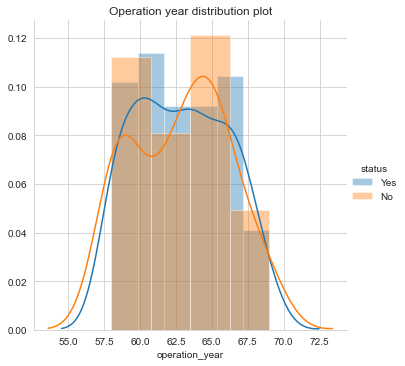

In [16]:
# histogram w.r.t operation_year
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.title('Operation year distribution plot')
plt.show();

**Observation:**
1. We can observe a lot of overlapping for operation year. 
2. During the years between 1960  to 1963 the number of patients survived after operation is high. A similar rise can also be seen between 1966 to 1967. Still this parameter can't be considered for determining patients survival due to overlapping.

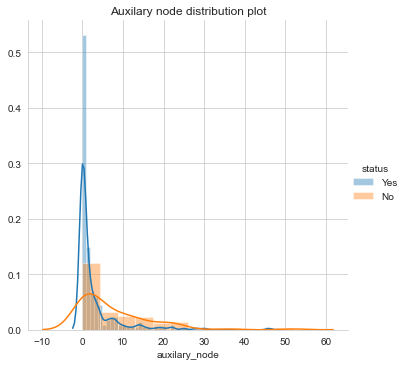

In [17]:
# histogram w.r.t auxilary_node
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "auxilary_node") \
   .add_legend();
plt.title('Auxilary node distribution plot')
plt.show();

**Observation:**
1. The auxilary_node though has some overlap but it still can be used to understand that the patient with 0 auxillary_node have more chances of survival.
2. Survival status drops when auxilary_node increases from 0 to 4 and becomes very less after auxilary_node reaches 30. 
3. A very slight rise of patient survived can be seen around 45 but it's too small. 
4. Patient not survived is also has it's peak between 0 to 4 but less than patient survived and continues to superceed the patient survived most of the time.

In [18]:
# Seperating the survived and not survived from datapoints
hb_survived = haberman[haberman['status'] == 'Yes']
hb_not_survived = haberman[haberman['status'] == 'No']

PDF and BIN Edges for survived patients
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF and BIN Edges for not survived patients
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


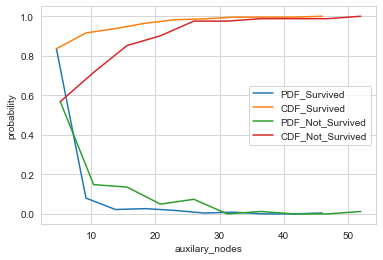

In [19]:
# Plotting the PDF and CDF for survived and not survived patients for detailed comparison using 
# auxilary_node as parameter

# PDF and CDF for survived patients
hist_survived, bin_edges = np.histogram(hb_survived['auxilary_node'], bins=10, 
                                 density = True)
pdf = hist_survived/(sum(hist_survived))
print("PDF and BIN Edges for survived patients")
print(pdf);
print(bin_edges);
print()
plt.plot(bin_edges[1:],pdf,label='PDF_Survived');
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='CDF_Survived')

# PDF and CDF for not survived patients
hist_not_survived, bin_edges = np.histogram(hb_not_survived['auxilary_node'], bins=10, 
                                 density = True)
pdf = hist_not_survived/(sum(hist_not_survived))
print("PDF and BIN Edges for not survived patients")
print(pdf);
print(bin_edges);
plt.plot(bin_edges[1:],pdf,label='PDF_Not_Survived');
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf,label='CDF_Not_Survived')

plt.xlabel('auxilary_nodes')
plt.ylabel('probability')
plt.legend()
plt.show();

**Observation:**

1. From CDF we can observer that patient's survival rate is more if the number of auxilary_node is less. Patient survival decreases as the auxilary_nodes increases.
2. 83.5% of the patients who have survived had auxilary nodes between 0 to 4.6.
3. 56.7% of patients who didn't survived had auxilary nodes between 0 to 5.2.

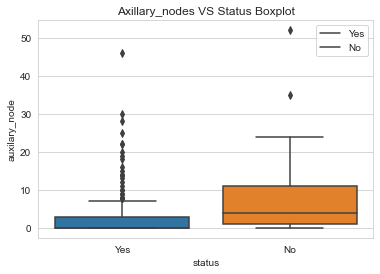

In [20]:
# Verifying the above results using box lot and violin plots

sns.boxplot(x='status',y='auxilary_node',data=haberman)
plt.title('Axillary_nodes VS Status Boxplot')
plt.gca().legend(('Yes','No'))
plt.show();


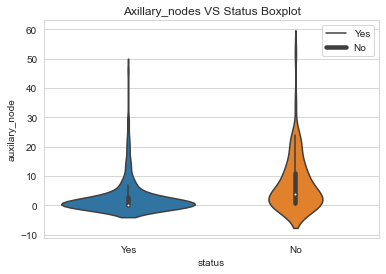

In [21]:
sns.violinplot(x='status',y='auxilary_node',data=haberman)
plt.title('Axillary_nodes VS Status Boxplot')
plt.gca().legend(('Yes','No'))
plt.show();

**Observation:**
1. From the plots above it can be verified that the survival is more is the suxilary_nodes are less (near to zero) and the survival decreases as the auxilary_nodes increases.
2. This can be verified from the violin plot. The density of the curve belonging to 'Yes' is more when the auxilary_nodes is less  and increases drastically when the auxilary_nodes increses.
3. From the above boxplot we can understand that as the axillary nodes increase post 5 (i.e mean of the no boxplot) the rate of deaths incrase drastically.

**Conclusion:**
1. It can be concluded from the above analysis that auxilary nodes is an important feature to determine the survival of the patient.
2. If the auxilary_nodes is less then the chance of survival is high as from all the patients who survived, 85% of them had auxilary nodes less than 5.
3. If auxilary nodes are more, chances of survival reduces as frrom all the patients who didn't survived, more than 60% of them had high number of auxilary_nodes(i.e auxilary_nodes greater than 5)
